# Domain: Sports
    
# Online Chess Data Analysis and Winner Prediction Model
Data for 20,000+ chess games played on Lichess, including moves, victory, rating, opening details and more.

|No.|Feature|Details|
|-|-|-|
|1.|game_id|Number of games taken in the data set|
|2.|rated|whether the game is rated or not|
|3.|turns|number of moves played by the winner|
|4.|victory_status|whether the game was won by placing a checkmate or due to running out of time, or when one of the player withdrawn due to some other reasons or whether the game ended in a draw|
|5.|winner|The color of the coins chosen by the person who won the game (Target column)|
|6.|time_increment|extra time obtained in the game|
|7.|white_id|The name of player with white move|
|8.|white_rating|Shows whether the player who has chosen white is a beginner, average player, master etc .eg: rating between 1200-1399 shows that the player is a beginner, 1400-1599 : average player, 2200-2399:Master etc|
|9.|black_id|The name of player with black move|
|10.|black_rating|Decides the level of the player who choose black coins|
|11.|moves|Moves & counter moves opted by the players|
|12.|opening_code|It provides the most common system for categorizing all chess openings.Despite having only 500 codes (from A00-E99), the system does a good job of segmenting openings. These codes help to organize chess games and openings, especially in game databases|
|13.|Opening_moves|Number of moves in the opening phase of the game where you decide how to develop your pieces and place your pawns. It usually lasts in 8-12 moves.The first moves of a chess game are termed the "opening" or "opening moves". A good opening will provide better protection of the King, control over an area of the board (particularly the center), greater mobility for pieces, and possibly opportunities to capture opposing pawns and pieces|
|14.|Opening_fullname|Chess openings are named after some place/city where it was played first or named after a person who first played it or sometimes even named after some animals and even some weird names which don’t make any sense, are given for some openings|
|15.|Opening_shortname|The short name of the opening full name|
|16.|Opening_response|counter move given by the player with respect to the opening moves|
|17.|Opening_variation|Used to describe a branch of another named opening, for example the Najdorf Variation, a line of the Sicilian Defense|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly_express as px # interactive data visualization library

ModuleNotFoundError: No module named 'plotly_express'

# 1: Data Collection and Reading

In [3]:
dt = pd.read_csv('chess_games.csv')
dt.head(2)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

#### Data description:

- Dataset is about an online chess game and the details of each games.
- Data of 20,058 online chess games.
- 17 column values or features for each chess games.
- 2 features have null values.
- Contains 3 types of data: Boolean, Object and int.

# 2: Pre-Processing

In [5]:
# We can change the index column to game_id column, because it contain 20058 unique values, which is same as the no. of rows.

dt.game_id.nunique()

20058

In [6]:
dt.set_index('game_id',inplace=True)
dt.head(2)

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation


# 2.1: Missing Value Handling

In [7]:
dt.isna().sum()

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

#### Findings:

- We can see last two columns have null values.
- Both of them are object type.
- 'opening_response' column have 18,851 null values, which is more than 50% of the total entries. so we can drop that column.
- 'opening_varition' column can be filled with mode.

In [8]:
dt.drop('opening_response', axis=1, inplace=True)
dt['opening_variation'].fillna(dt['opening_variation'].mode()[0],inplace=True)

dt.isna().sum()

rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_fullname     0
opening_shortname    0
opening_variation    0
dtype: int64

In [9]:
dt.shape

(20058, 15)

# 2.2: Outlier Detection and Handling

<function matplotlib.pyplot.show(close=None, block=None)>

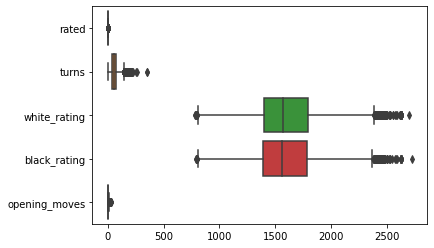

In [14]:
sns.boxplot(data=dt,orient='h')
plt.show

In [15]:
dt.rated.value_counts()

True     16155
False     3903
Name: rated, dtype: int64

#### Findings:

- Rated column ins a boolean type contain two values false and true, so that it doesn't contain any valid outliers.
- Remaining 3 columns can handled for ouliers removal.

In [16]:
out=['turns','white_rating','black_rating','opening_moves']
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling Outliers in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(dt[i],25,interpolation='midpoint')
    Q2=np.percentile(dt[i],50,interpolation='midpoint')
    Q3=np.percentile(dt[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in dt[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=dt[i] > up_lim, dt[i]
    i1=dt.loc[ind1].index

    dt.drop(i1,inplace=True)
    
    print('Shape of dataset after removal of outliers in',i.upper(),'column:',dt.shape,'\n\n')

Handling Outliers in TURNS COLUMN: 

The values below -26.0 and above 142.0 are outliers.
There are 428 outliers in turns column.
Shape of dataset after removal of outliers in TURNS column: (19630, 15) 


Handling Outliers in WHITE_RATING COLUMN: 

The values below 804.0 and above 2380.0 are outliers.
There are 131 outliers in white_rating column.
Shape of dataset after removal of outliers in WHITE_RATING column: (19506, 15) 


Handling Outliers in BLACK_RATING COLUMN: 

The values below 803.0 and above 2363.0 are outliers.
There are 87 outliers in black_rating column.
Shape of dataset after removal of outliers in BLACK_RATING column: (19425, 15) 


Handling Outliers in OPENING_MOVES COLUMN: 

The values below -1.5 and above 10.5 are outliers.
There are 844 outliers in opening_moves column.
Shape of dataset after removal of outliers in OPENING_MOVES column: (18581, 15) 




<function matplotlib.pyplot.show(close=None, block=None)>

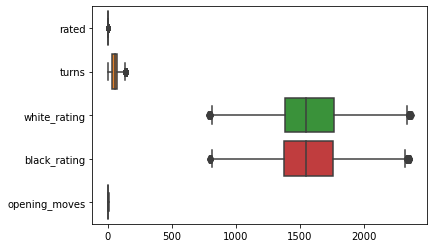

In [17]:
sns.boxplot(data=dt,orient='h')
plt.show

In [18]:
dt.rated.value_counts()

True     15027
False     3554
Name: rated, dtype: int64

#### Findings:

- Rated column ins a boolean type contain two values false and true, so that it doesn't contain any valid outliers.
- Remaining 3 columns can handled for ouliers removal.

In [19]:
out=['turns','white_rating','black_rating','opening_moves']
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling Outliers in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(dt[i],25,interpolation='midpoint')
    Q2=np.percentile(dt[i],50,interpolation='midpoint')
    Q3=np.percentile(dt[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in dt[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=dt[i] > up_lim, dt[i]
    i1=dt.loc[ind1].index

    dt.drop(i1,inplace=True)
    
    print('Shape of dataset after removal of outliers in',i.upper(),'column:',dt.shape,'\n\n')

Handling Outliers in TURNS COLUMN: 

The values below -24.0 and above 136.0 are outliers.
There are 143 outliers in turns column.
Shape of dataset after removal of outliers in TURNS column: (18438, 15) 


Handling Outliers in WHITE_RATING COLUMN: 

The values below 811.0 and above 2339.0 are outliers.
There are 30 outliers in white_rating column.
Shape of dataset after removal of outliers in WHITE_RATING column: (18418, 15) 


Handling Outliers in BLACK_RATING COLUMN: 

The values below 813.5 and above 2321.5 are outliers.
There are 51 outliers in black_rating column.
Shape of dataset after removal of outliers in BLACK_RATING column: (18379, 15) 


Handling Outliers in OPENING_MOVES COLUMN: 

The values below -1.5 and above 10.5 are outliers.
There are 0 outliers in opening_moves column.
Shape of dataset after removal of outliers in OPENING_MOVES column: (18379, 15) 




<function matplotlib.pyplot.show(close=None, block=None)>

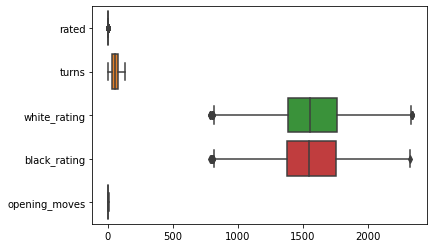

In [20]:
sns.boxplot(data=dt,orient='h')
plt.show

# 2.3: Feature Reduction

In [21]:
dt.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'time_increment',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'moves',
       'opening_code', 'opening_moves', 'opening_fullname',
       'opening_shortname', 'opening_variation'],
      dtype='object')

In [22]:
#Dropping columns
dt.drop(['rated','time_increment','opening_fullname'],axis=1,inplace=True)
dt.shape

(18379, 12)

# 2.4: Standardization/Normalization

In [47]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
s=dt[['turns','white_rating','black_rating','opening_moves']]
s=standardisation.fit_transform(s)

In [48]:
s=pd.DataFrame(s)
s.columns=['turns','white_rating','black_rating','opening_moves']
s.describe().round(2)

,turns,white_rating,black_rating,opening_moves
count,18379.00,18379.00,18379.00,18379.00
mean,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.91,-2.86,-2.79,-1.55
25%,-0.73,-0.69,-0.68,-0.65
50%,-0.11,-0.09,-0.08,-0.19
75%,0.63,0.68,0.67,0.71
max,2.67,2.75,2.70,2.52


# 3: Exploratory Data Analysis (EDA)

## 3.1: Univariate Analysis

### 3.1.1: The percentage of games were won by white, Black. How many ended in a draw?

In [49]:
# get a dataset that displays the counts of each outcome
winners = pd.DataFrame(dt['winner'].value_counts()).reset_index().rename(columns={'index': 'Winner', 'winner': 'Count'})
winners

,Winner,Count
0,White,9233
1,Black,8394
2,Draw,752


In [50]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [29]:
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [30]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


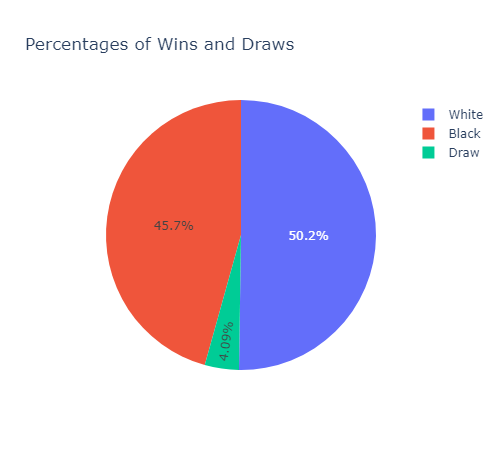

In [51]:
fig=px.pie(winners,title='Percentages of Wins and Draws',names='Winner',values='Count', height=450,width=500)
fig.show('png')

#### Insight:

- With this pie chart, we can see that almost half (50.1%) of all games were won with the white pieces, 45.6% by black, and 4.22% games ended in a draw.
- 9318 games won by white pieces.
- 8479 games won by black pieces.

### 3.1.2: The most significant opening technique.

In [52]:
opening=dt["opening_shortname"].value_counts().nlargest(10)
opening

Sicilian Defense        2209
French Defense          1289
Queen's Pawn Game       1182
King's Pawn Game         890
Queen's Gambit           820
Italian Game             807
Ruy Lopez                753
Scandinavian Defense     699
English Opening          682
Philidor Defense         662
Name: opening_shortname, dtype: int64

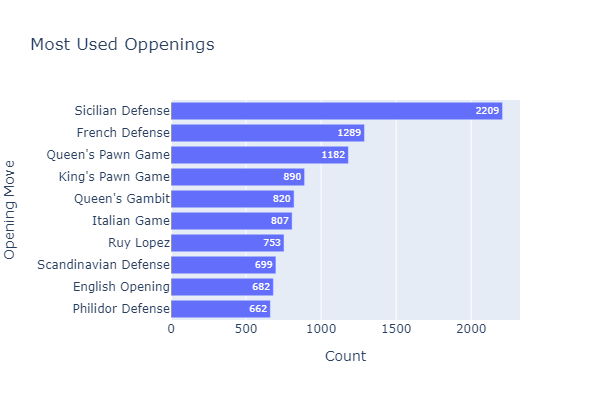

In [53]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
           width=600,height=400,
           labels={"x":"Count ","y":"Opening Move "},
           text=opening.values).update_yaxes(categoryorder='total ascending')
fig.show('png')

#### Insights:

- Out of 128 opening moves these are the top 10 moves.
- Sicilian Defense is the most used opening move.
- French Defence and Queen's Pawn game are followed the Sicilian Defence

### 3.1.3: User With Most Wins

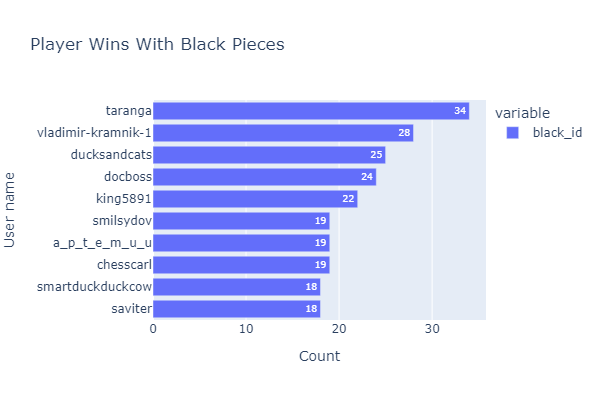

In [54]:
black_win_data = dt[dt['winner']=='Black']

fig=px.bar(black_win_data['black_id'].value_counts().head(10),
       title='Player Wins With Black Pieces',
       orientation='h',
       width=600,height=400,labels={"value":"Count ","index":"User name"},text=black_win_data['black_id'].value_counts().head(10)
      ).update_yaxes(categoryorder='total ascending')
fig.show('png')

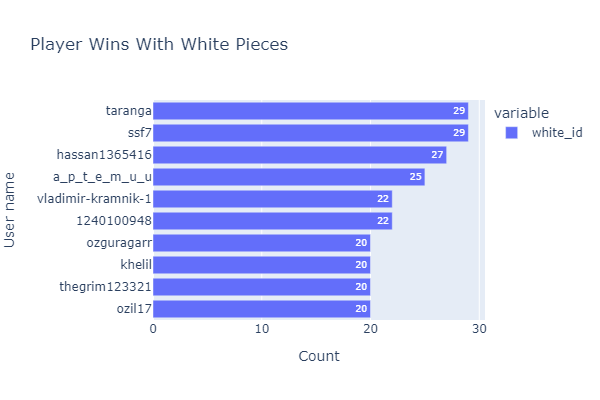

In [55]:
white_win_data = dt[dt['winner']=='White']

fig=px.bar(white_win_data['white_id'].value_counts().head(10),
       title='Player Wins With White Pieces',
       orientation='h',
       width=600,height=400,labels={"value":"Count ","index":"User name"},text=white_win_data['white_id'].value_counts().head(10)
      ).update_yaxes(categoryorder='total ascending')
fig.show('png')

#### Insights:

- user id with taranga wins most of the games irrespective of white or black coins.
- 3 of the users were in top 10 with both black and white pieces.

## 3.2: Bivariate Analysis

### 3.2.1: Proportions of winners according to piece color of winner, and victory_status.

In [56]:
winner_status = (pd.DataFrame(dt[['winner', 'victory_status']].value_counts()).reset_index()
                 .rename(columns={'Count': 'winner', 0: 'count'}))

winner_status = winner_status[~(winner_status['winner'] == 'Draw')]
winner_status

,winner,victory_status,count
0,White,Resign,5415
1,Black,Resign,4899
2,White,Mate,3090
3,Black,Mate,2763
4,Black,Out of Time,732
6,White,Out of Time,728


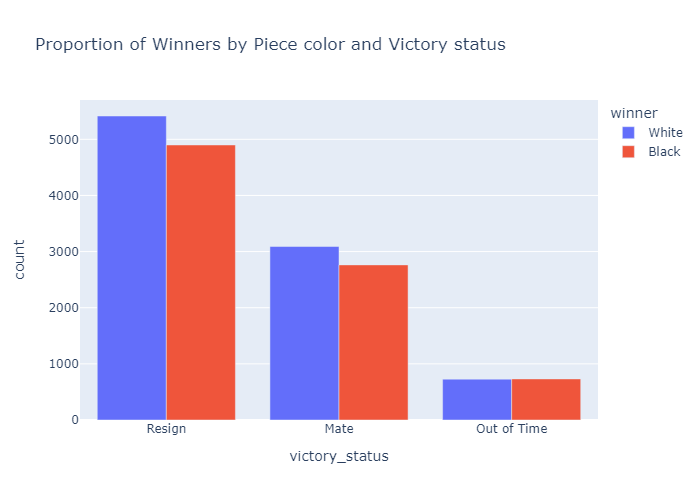

In [57]:
# bar chart that shows proportion of winners by piece color of the winner and the type of victory
fig=px.bar(winner_status,
       title='Proportion of Winners by Piece color and Victory status',
       x='victory_status',
       y='count',
       color='winner',
       barmode='group',  
       height=500,
       width=700,)
fig.show('png')

#### Insight:

- Except for out of time victory status, "white" have victory in all other statsuses

### 3.2.2: How many times the winner was the one that has higher rate?

In [58]:
rate_win=dt[["winner","white_rating","black_rating"]]
rate_win.head()

,winner,white_rating,black_rating
game_id,,,
1,White,1500,1191
2,Black,1322,1261
3,White,1496,1500
4,White,1439,1454
5,White,1523,1469


In [59]:
rate_win["w_r>b_r"]=(rate_win["white_rating"] > rate_win["black_rating"])
rate_win.head()

,winner,white_rating,black_rating,w_r>b_r
game_id,,,,
1,White,1500,1191,True
2,Black,1322,1261,True
3,White,1496,1500,False
4,White,1439,1454,False
5,White,1523,1469,True


In [60]:
win_rate_stat=((rate_win["winner"]=="White")&(rate_win["w_r>b_r"]==True)) | ((rate_win["winner"]=="Black")&(rate_win["w_r>b_r"]==False))
rate_win["win_rate_status"]="low_rating win"
rate_win.loc[win_rate_stat,"win_rate_status"]="high_rating win"
rate_win

,winner,white_rating,black_rating,w_r>b_r,win_rate_status
game_id,,,,,
1,White,1500,1191,True,high_rating win
2,Black,1322,1261,True,low_rating win
3,White,1496,1500,False,low_rating win
4,White,1439,1454,False,low_rating win
5,White,1523,1469,True,high_rating win
...,...,...,...,...,...
20054,White,1691,1220,True,high_rating win
20055,Black,1233,1196,True,low_rating win
20056,White,1219,1286,False,low_rating win


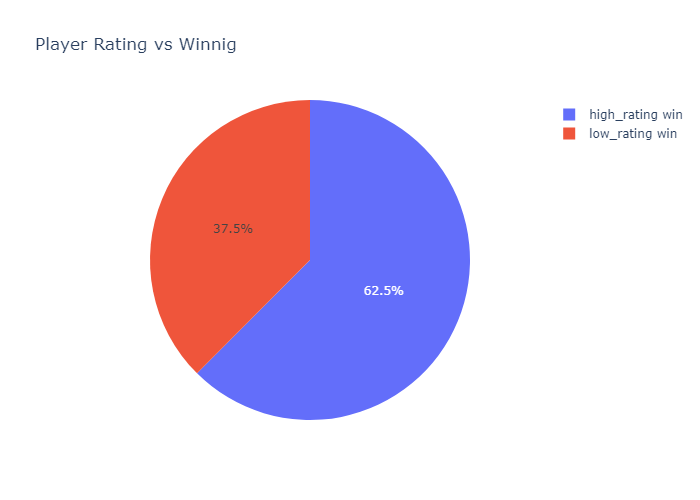

In [61]:
fig=px.pie(rate_win["win_rate_status"].value_counts(),
           names=rate_win["win_rate_status"].value_counts().index,values=rate_win["win_rate_status"].value_counts().values,
           title="Player Rating vs Winnig",
           labels={"names":"Situation ","values":"Count "})
fig.show('png')

#### Insisghts:

- 62.4% of the games are won by the player with high rating.
- Remaining 37.6% of the games won by player with low rating.
- Majority of the case, won by high rated player.

In [62]:
dt['moves']

game_id
1        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
2        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
3        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
4        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
5        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20054    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20055    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20056    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20057    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20058    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 18379, dtype: object

In [63]:
dt["opening_move"]=dt["moves"].str.slice(0,2)


In [65]:
black=dt[dt["winner"]=="Black"].opening_move.value_counts().nlargest(9)
black

e4    5165
d4    1869
c4     284
Nf     280
e3     248
g3      95
b3      80
f4      80
d3      77
Name: opening_move, dtype: int64

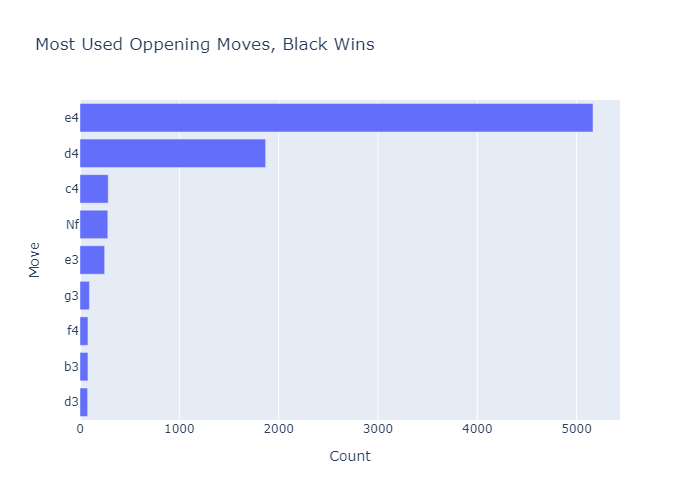

In [66]:
fig=px.bar(y=black.index,x=black.values,
           title="most used oppening moves, black wins".title(),
           labels={"x":"Count ","y":"Move "}).update_yaxes(categoryorder='total ascending')
fig.show('png')

### 3.2.4: Opening move that most frequently used in games in which white won

In [67]:
white=dt[dt["winner"]=="White"].opening_move.value_counts().nlargest(9)
white

e4    5857
d4    2076
c4     368
Nf     341
e3     138
g3      80
b3      77
f4      66
d3      48
Name: opening_move, dtype: int64

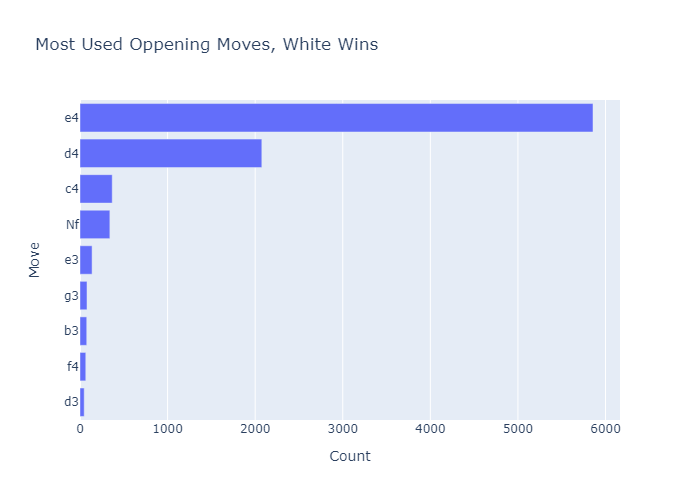

In [68]:
fig=px.bar(y=white.index,x=white.values,
           title="most used oppening moves, white wins".title(),
           labels={"x":"Count ","y":"Move "}).update_yaxes(categoryorder='total ascending')
fig.show('png')

#### Insights:

- Both black and white who wins the game used the same moves for opening.
- We can say that the winning move, top 5 moves is done more by white.

# 4: Modelling

In [69]:
dt.columns

Index(['turns', 'victory_status', 'winner', 'white_id', 'white_rating',
       'black_id', 'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_shortname', 'opening_variation', 'opening_move'],
      dtype='object')

In [70]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18379 entries, 1 to 20058
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              18379 non-null  int64 
 1   victory_status     18379 non-null  object
 2   winner             18379 non-null  object
 3   white_id           18379 non-null  object
 4   white_rating       18379 non-null  int64 
 5   black_id           18379 non-null  object
 6   black_rating       18379 non-null  int64 
 7   moves              18379 non-null  object
 8   opening_code       18379 non-null  object
 9   opening_moves      18379 non-null  int64 
 10  opening_shortname  18379 non-null  object
 11  opening_variation  18379 non-null  object
 12  opening_move       18379 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.5+ MB


In [71]:
dt_p=dt.drop(['victory_status','opening_variation','white_id','black_id','moves','opening_move'],axis=1)

In [72]:
dt_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18379 entries, 1 to 20058
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              18379 non-null  int64 
 1   winner             18379 non-null  object
 2   white_rating       18379 non-null  int64 
 3   black_rating       18379 non-null  int64 
 4   opening_code       18379 non-null  object
 5   opening_moves      18379 non-null  int64 
 6   opening_shortname  18379 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.6+ MB


## Encoding

In [73]:
#Except the target column (winner), all other features are to encoded

from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
dt_p['opening_shortname']=class_en.fit_transform(dt_p['opening_shortname'])
dt_p['opening_code']=class_en.fit_transform(dt_p['opening_code'])

In [74]:
dt_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18379 entries, 1 to 20058
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              18379 non-null  int64 
 1   winner             18379 non-null  object
 2   white_rating       18379 non-null  int64 
 3   black_rating       18379 non-null  int64 
 4   opening_code       18379 non-null  int32 
 5   opening_moves      18379 non-null  int64 
 6   opening_shortname  18379 non-null  int32 
dtypes: int32(2), int64(4), object(1)
memory usage: 1.5+ MB


In [75]:
x=dt_p.drop(['winner'],axis=1)
y=pd.DataFrame(dt_p['winner'])

## Models: This is classification model to predict who is the winner.
    
Logisitic regression, k-NN, SVM(radial and polynomial), Decision Tree, Random Forest, Gradient Boosting, Extreme Gradient Boosting

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [77]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

# to obtain optimum K value
# so we want to create model with varied k value

acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') #parameters are no.of neighbors, method to measure the distance
    classifier.fit(x_train,y_train) # creating model
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) # find accuracy values in each case
    acc_values.append(acc) # listing this values to the acc list

Text(0, 0.5, 'accuracy')

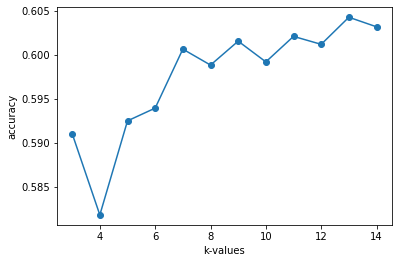

In [78]:
# for finding respected k value, we can plot acc value and k value

plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy') # from plot it is clear that the accuracy is high for k-value with 13

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=13)
dtc=DecisionTreeClassifier(random_state=SEED)
svc_r = SVC(kernel='rbf')
svc_p = SVC(kernel='poly')
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dtc),
             ('Radial SVM',svc_r),('Polynimial SVM',svc_p)]

In [80]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.2f}'.format(class_name,accuracy))

LogisticRegression:0.63
K Nearest Neighbors:0.60
Decision Tree:0.58
Radial SVM:0.62
Polynimial SVM:0.61


In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
SEED = 42
vc=VotingClassifier(estimators=classifiers)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
classifiers=[('Voting Classifier',vc),('Random Forest',rf),('Gradient Boosting',gb),('Extreme Gradient Boosting',xgb)]

In [85]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.2f}'.format(class_name,accuracy))

Voting Classifier:0.63
Random Forest:0.66
Gradient Boosting:0.71
[21:08:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting:0.85


#### Insight:

- Here the best fit for our prediction is **Extreme Gradient Boosting model with 85% accuracy.**

# 5: Model Fine Tuning

In [83]:
xgb.fit(x_train,y_train)

[21:07:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [84]:
xgbt=XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgbt.fit(x_train,y_train)

[21:07:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:07:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              subsample=0.8, tree_method='exact', validate_parameters=1, ...)

In [86]:
y_pred=xgbt.predict(x_test)
round(accuracy_score(y_test,y_pred),2)

0.85

#### Findings:

- After fine tuning of XGBoost model, we got an accuracy of 86%.
- We can go with same model for predcition of winner in online chess game, white or black or draw
